# Elementary feature interpretation

* Linear classifier learns a weight for every feature
* This weight (to a degree) correlates with the importance of this feature
* Study the attributes of a trained `LinearSVC` here https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
* `coef_` seems to be the right choice    

In [1]:
#Load the previously saved model
import pickle
import sklearn
with open("saved_model.pickle","rb") as f:
    classifier,vectorizer=pickle.load(f)
    
print("classifier weights:",classifier.coef_)
print("their shape",classifier.coef_.shape)

classifier weights: [[-0.00424805 -0.00873877 -0.0004353  ...  0.          0.00021581
  -0.00089298]]
their shape (1, 68408)


* We will need to know which weight corresponds to which feature
* The vectorizer has this information
* Study the attributes here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
* `vocabulary` seems to be the right choice

In [2]:
# print(vectorizer.vocabulary_) # beware! large print
print(list(vectorizer.vocabulary_.items())[:30],"...")

[('does', 17783), ('anyone', 3363), ('know', 33743), ('where', 66517), ('can', 9444), ('see', 53555), ('or', 43034), ('download', 18197), ('the', 60663), ('what', 66467), ('like', 35430), ('about', 1154), ('you', 67946), ('season', 53449), ('episodes', 20358), ('in', 30186), ('internet', 31245), ('because', 5895), ('would', 67400), ('die', 16770), ('to', 61376), ('them', 60696), ('and', 2948), ('here', 28058), ('germany', 24969), ('there', 60745), ('won', 67195), ('be', 5778), ('shown', 54752), ('on', 42826)] ...


* The vocabulary is a dictionary: feature -> index
* We will need it the other way, i.e. we will need to ask using an index, and get the feature

In [3]:
#Reverse the dictionary
index2feature={}
for feature,idx in vectorizer.vocabulary_.items():
    assert idx not in index2feature #This really should hold
    index2feature[idx]=feature
#Now we can query index2feature to get the feature names as we need

* We need now to sort the classifier weights
* ...and keep the information about which features (indices) they correspond to
* So a simple `sort()` does not cut it, we would not keep the indices

In [4]:
# Solution 1:

# make a list of (weight, index), sort it
lst=[]
for idx,weight in enumerate(classifier.coef_[0]):
    lst.append((weight,idx))
lst.sort() #sort

#Print first few and last few
for weight,idx in lst[:30]: #first 30 (ie lowest weight)
    print(index2feature[idx])
print("----------------------------------------------------")
#Take the last 30 (lst[-30:]) but these now come from weakest to strongest
#so reverse the list using [::-1]
for weight,idx in lst[-30:][::-1]:
    print(index2feature[idx])


worst
bad
waste
awful
boring
poor
nothing
terrible
worse
dull
no
unfortunately
stupid
ridiculous
poorly
supposed
minutes
annoying
script
money
avoid
disappointment
instead
horrible
disappointing
fails
plot
save
lame
crap
----------------------------------------------------
great
excellent
perfect
best
wonderful
amazing
loved
love
fun
today
favorite
well
highly
enjoyed
beautiful
enjoyable
definitely
brilliant
superb
job
especially
simple
also
fantastic
enjoy
very
liked
still
dvd
makes


In [5]:
# Solution #2
# Numpy can help us
# argsort gives a sequence of indices that sort an array
import numpy

indices=numpy.argsort(classifier.coef_[0])
print(indices)
for idx in indices[:30]:
    print(index2feature[idx])
print("-------------------------------")
for idx in indices[::-1][:30]: #you can also do it the other way round, reverse, then pick
    print(index2feature[idx])

[67388  5009 66033 ... 44948 20991 26119]
worst
bad
waste
awful
boring
poor
nothing
terrible
worse
dull
no
unfortunately
stupid
ridiculous
poorly
supposed
minutes
annoying
script
money
avoid
disappointment
instead
horrible
disappointing
fails
plot
save
lame
crap
-------------------------------
great
excellent
perfect
best
wonderful
amazing
loved
love
fun
today
favorite
well
highly
enjoyed
beautiful
enjoyable
definitely
brilliant
superb
job
especially
simple
also
fantastic
enjoy
very
liked
still
dvd
makes


* This seems to work like charm!
* We can sample the features across the range to get some further idea
* let's take every 100th feature

In [6]:
indices=numpy.argsort(classifier.coef_[0])

for idx in indices[::100]:
    print(index2feature[idx],end=", ")

worst, then, so, contrived, talents, bear, yawn, wretched, bob, shark, amounts, cries, interminable, invisible, invested, alligator, vince, selfish, undermines, fisherman, trendy, firstly, stunk, thankless, ramsey, eggs, crosby, dead, newcomer, dreamgirls, del, celebrated, drawl, gimmicky, tolerate, boringly, come, aime, surrealism, gods, tilly, predicted, nayland, jerking, actively, waldemar, bottle, compounded, hazy, chiles, jung, morley, puddle, leaded, bombers, marionettes, upscale, remaking, variously, apropos, reno, ashford, indictment, parishioners, crammed, bradbury, newborn, shifty, titter, misanthropic, germ, cornel, oppressively, impervious, commands, ding, danyael, bueller, luke, darkling, chesty, gentleness, fireballs, cassetti, necklines, nuyoricans, annoyance, dyes, lyndon, benno, dint, wading, abuses, drips, increases, royally, ez, deckchair, quayle, misfit, mirrored, christmastime, psicoanalitical, patting, liquer, griffin, unworthy, nelli, scriptwriter, mcinally, andr

* What have we learned?
* Most of the features seem to form a mass without a strong correlation with the sentiment
* Only the very extremes of the list seem to be strongly sentiment-biased
* This can be tested by looking at the distribution of the weights:

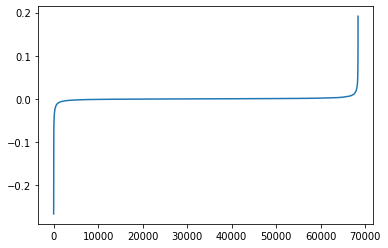

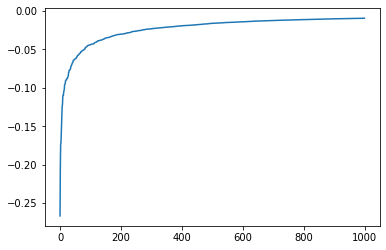

In [9]:
import matplotlib.pyplot as plt
import numpy as np
#widget is interactive but not shown on github
#inline is static fig but shown on github
#%matplotlib widget
%matplotlib inline

plt.figure()
y = np.sort(classifier.coef_[0])
plt.plot(y)
plt.show()

#let's look at the beginning, see how fast the weights drop
plt.figure()
y=np.sort(classifier.coef_[0])
plt.plot(y[:1000])
plt.show()
